In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from csv import reader
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras.metrics as km
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [70]:
# load trained model from my_model
model = keras.models.load_model("my_model")

In [71]:
df=pd.read_csv('testdata.csv')

#FINDING MAX AND MIN
max=df['intensity'].max()
min=df['intensity'].min()

for row in df.itertuples():
  #print(df.iloc[row.Index]['intensity'])
  df.loc[row.Index, 'intensity'] = -(df.loc[row.Index, 'intensity'] - min) / (min - max)

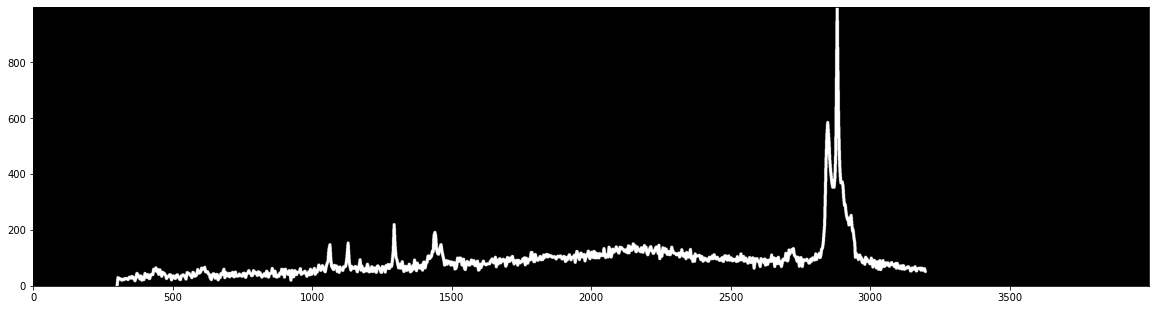

In [48]:
X = []
Y = []

color_line = (255, 255, 255)
thickness = 10
img_height , img_width = 400, 100

image=np.zeros((1000,4000,3),np.uint8)
previous_point = (0,0)
frames_list = []

with open('ftir_metadata.csv', 'r') as read_obj_classes:
    csv_reader_classes = reader(read_obj_classes)
    header = next(csv_reader_classes)
    classes = []
    for row in csv_reader_classes:
      if row[0] not in classes:
        classes.append(row[0])

for row in df.itertuples():
  wavenumber = df.iloc[row.Index]['wavenumber']
  intensity = df.iloc[row.Index]['intensity']
  point = (int(float(wavenumber)), int(float(intensity)*1000))
  if previous_point != (0,0):
    image = cv2.line(image, previous_point, point, color_line, thickness)
  previous_point = point

plt.figure(figsize=(20, 20))
plt.imshow(image, origin='lower')
plt.show()

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (img_height, img_width))
frames_list.append(image)
X.append(frames_list)

X = np.asarray(X)

In [72]:
predictions = model.predict(X)

f = 10

top_k_values, top_k_indices = tf.nn.top_k(predictions, k)

indices = top_k_indices.numpy()[0]

print("top predictions:")

for i in range(k):
  print(i + 1, classes[indices[i]])

top predictions:
1 HDPE
2 fibre thermoplastic elastomere
3 polyethylene low density
4 PET
5 sealing ring EPDM
6 polyethylene foamed
7 polu butadiene acrylonitrile
8 polyesterterpthalate
9 ethyl cellulose
10 fur yak bleached
